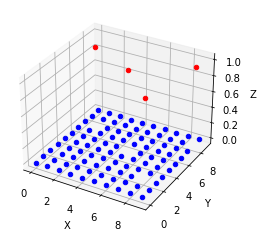

Sum of z values: 4


In [5]:
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 打开图片
image_path = r"D:\1.png"
image = Image.open(image_path)

# 获取图片的像素数据
pixels = image.load()

# 图片尺寸
width, height = image.size

# 创建3D坐标系
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 计算z值之和
z_sum = 0

# 遍历每个像素点
for x in range(width):
    for y in range(height):
        # 获取像素的RGB值
        r, g, b = pixels[x, y]

        # 判断是否为红色（假设阈值为100，你可以根据实际情况进行调整）
        if r > 100 and g < 100 and b < 100:
            z = 1
            z_sum += z
            ax.scatter(x, y, z, c='red')  # 在3D坐标系中添加红色点
        else:
            z = 0
            ax.scatter(x, y, z, c='blue')  # 在3D坐标系中添加蓝色点

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图形
plt.show()

# 打印z值之和
print("Sum of z values:", z_sum)

In [1]:
from PIL import Image
image_path = r"D:\Adelaide\Trimester\2023 Trimester 3\MATHS 7097B - Data Science Res Proj Pt B\红点标记图day3\col10row8.jpg"
image = Image.open(image_path)
pixels = image.load()
width, height = image.size
print(width, height)

1980 5940


In [1]:
from PIL import Image
image_path1 = r"D:\Adelaide\Trimester\2023 Trimester 3\MATHS 7097B - Data Science Res Proj Pt B\红点标记图day1\col10row8.jpg"
image_path2 = r"D:\Adelaide\Trimester\2023 Trimester 3\MATHS 7097B - Data Science Res Proj Pt B\红点标记图day2\col10row8.jpg"
image_path3 = r"D:\Adelaide\Trimester\2023 Trimester 3\MATHS 7097B - Data Science Res Proj Pt B\红点标记图day3\col10row8.jpg"
image_path4 = r"D:\Adelaide\Trimester\2023 Trimester 3\MATHS 7097B - Data Science Res Proj Pt B\红点标记图day1\col5row2.jpg"
image_path5 = r"D:\Adelaide\Trimester\2023 Trimester 3\MATHS 7097B - Data Science Res Proj Pt B\红点标记图day2\col5row2.jpg"
image_path6 = r"D:\Adelaide\Trimester\2023 Trimester 3\MATHS 7097B - Data Science Res Proj Pt B\红点标记图day3\col5row2.jpg"
image_path = [image_path1,image_path2,image_path3,image_path4,image_path5,image_path6]
for i in image_path:
    image = Image.open(i)
    pixels = image.load()
    width, height = image.size
    print(width, height)
    

1739 4921
1998 6012
1980 5940
1680 5004
1962 5994
1819 5977


In [2]:
left_half = image.crop((0, 0, width // 2, height))
right_half = image.crop((width // 2, 0, width, height))
width, height = left_half.size
print(width, height)
width, height = right_half.size
print(width, height)

1026 6138
1026 6138


In [2]:
from PIL import Image

image_path = r"D:\Adelaide\Trimester\2023 Trimester 3\MATHS 7097B - Data Science Res Proj Pt B\红点标记图day1\col10row8.jpg"
image = Image.open(image_path)

pixels = image.load()

# 图片尺寸
width, height = image.size

z_sum = 0
for x in range(width):
    for y in range(height):
        color = pixels[x, y]
        if color[0] >= 250 and color[0] <= 255 and color[1] <= 5 and color[2] <= 5:
            z_sum =  z_sum + 1 

print("Sum of z values:", z_sum)

Sum of z values: 37


In [3]:
from PIL import Image
image_path1 = r"D:\Adelaide\Trimester\2023 Trimester 3\MATHS 7097B - Data Science Res Proj Pt B\红点标记图day3\col10row8.jpg"
image_path2 = r"D:\Adelaide\Trimester\2023 Trimester 3\MATHS 7097B - Data Science Res Proj Pt B\红点标记图day3\col5row2.jpg"
image_path = [image_path1,image_path2]
for i in image_path:
    image = Image.open(i)
    pixels = image.load()
    width, height = image.size
    z_sum = 0
    for x in range(width):
        for y in range(height):
            color = pixels[x, y]
            if color[0] >= 250 and color[0] <= 255 and color[1] <= 5 and color[2] <= 5:
                z_sum =  z_sum + 1 
    print(".jpg z values:", z_sum)

.jpg z values: 178
.jpg z values: 153


In [1]:
import os
import csv
import subprocess
from PIL import Image

folder_path = r"D:\Adelaide\Trimester\2023 Trimester 3\MATHS 7097B - Data Science Res Proj Pt B\红点标记图day3"
csv_file_path = "day3_red_points_PNNsummary_cut2.csv"

with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Filename", "Row", "Col", "Z_Sum"])
    
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)
            image = Image.open(image_path)
            pixels = image.load()
            width, height = image.size
            z_sum = 0
            for x in range(width):
                for y in range(height):
                    color = pixels[x, y]
                    if color[0] >= 240 and color[0] <= 255 and color[1] <= 5 and color[2] <= 5:
                        z_sum += 1
            print(f"The total number of red points in {filename} is {z_sum}")
            
            subimage_width = width // 10
            subimage_height = height // 12
            for row in range(12):
                for col in range(10):
                    left = col * subimage_width
                    upper = row * subimage_height
                    right = left + subimage_width
                    lower = upper + subimage_height
                    subimage = image.crop((left, upper, right, lower))
                    subimage_pixels = subimage.load()
                    z_sum_sub = 0
                    for x in range(subimage_width):
                        for y in range(subimage_height):
                            color = subimage_pixels[x, y]
                            if color[0] >= 240 and color[0] <= 255 and color[1] <= 5 and color[2] <= 5:
                                z_sum_sub += 1
                    subimage_name = f"Subimage_{row}_{col}"
                    
                    csv_writer.writerow([filename, row, col, z_sum_sub])

subprocess.run(["start", csv_file_path], shell=True)

The total number of red points in col10row8.jpg is 178
The total number of red points in col5row2.jpg is 153


CompletedProcess(args=['start', 'day3_red_points_PNNsummary_cut2.csv'], returncode=0)